# Data Analysis

## Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Downloading the Data

In [2]:
trainingData = pd.read_csv("../Data/train.csv")
trainingData["Cabin"] = trainingData["Cabin"].apply(str)
trainingData["Embarked"] = trainingData["Embarked"].apply(str)

AgeBins = pd.IntervalIndex.from_tuples([(0,15),(15,30),(30,45),(45,60),(60,75),(75,90),(90,105),(105,120)])
TicketBins = pd.IntervalIndex.from_tuples([(0,50000), (50000,100000), (100000,150000),(150000,200000),(200000, 250000), (250000, 300000), (300000, 350000)])
CostBins = pd.IntervalIndex.from_tuples([(-1, 50),(50,100), (100,150), (150, 200), (200, 250), (250, 300), (300,350), (350,400), (400, 450), (450, 500), (500, 550)])

trainingData["AgeGroup"] = pd.cut(trainingData['Age'], bins=AgeBins).cat.add_categories(pd.Interval(-2,-1)).fillna(pd.Interval(-2,-1))
trainingData['TicketGroup'] = pd.cut(pd.to_numeric(trainingData['Ticket'], errors="coerce"), bins=TicketBins).cat.add_categories(pd.Interval(-2,-1)).fillna(pd.Interval(-2,-1))
trainingData['CostGroup'] = pd.cut(trainingData['Fare'], bins=CostBins).cat.add_categories(pd.Interval(-2,-1)).fillna(pd.Interval(-2,-1))
trainingData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,TicketGroup,CostGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,"(15, 30]","(-2, -1]","(-1, 50]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 45]","(-2, -1]","(50, 100]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,"(15, 30]","(-2, -1]","(-1, 50]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 45]","(100000, 150000]","(50, 100]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,"(30, 45]","(-2, -1]","(-1, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S,"(15, 30]","(200000, 250000]","(-1, 50]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(15, 30]","(100000, 150000]","(-1, 50]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,nan,S,"(-2, -1]","(-2, -1]","(-1, 50]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(15, 30]","(100000, 150000]","(-1, 50]"


## Examining the Table Values

### PClass Analysis

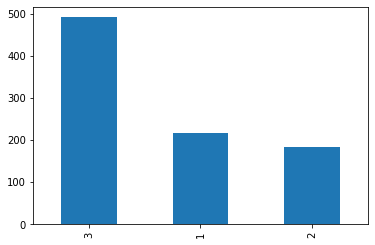

In [3]:
trainingData["Pclass"].fillna("Empty").value_counts().plot(kind = "bar")

### Gender Analysis

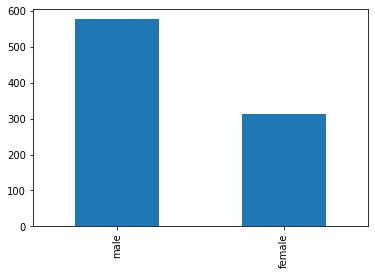

In [4]:
trainingData["Sex"].fillna("Empty").value_counts().plot(kind = "bar")

### Age Analysis

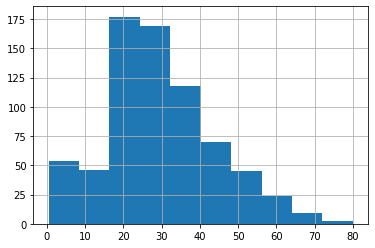

In [5]:
trainingData["Age"].hist(bins=10)

In [6]:
print("Number of NaN values: " + str(trainingData["Age"].isna().sum()))
print("Percent NaN: " + str(trainingData["Age"].isna().sum()/trainingData["Age"].count()))

Number of NaN values: 177
Percent NaN: 0.24789915966386555


### Sibling Number Analysis

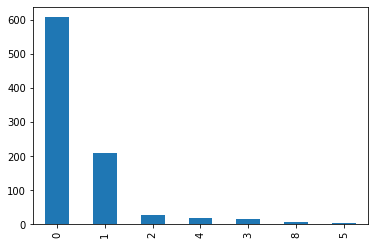

In [7]:
trainingData["SibSp"].fillna("Empty").value_counts().plot(kind = "bar")

### Ticket Analysis

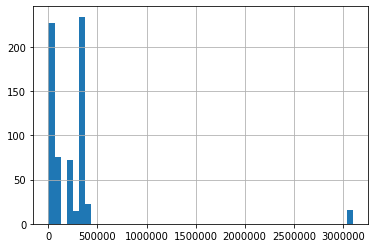

In [8]:
temp = pd.to_numeric(trainingData["Ticket"], errors='coerce')
temp.hist(bins = 50)

In [9]:
print("NaN values: " + str(temp.isna().sum()))
print("Percent NaN: " + str(temp.isna().sum()/temp.count()))

NaN values: 230
Percent NaN: 0.34795763993948564


### Fare Analysis

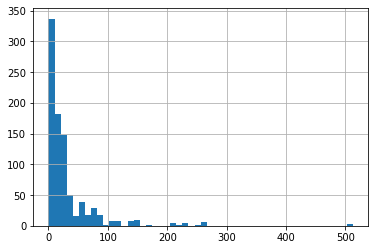

In [10]:
trainingData["Fare"].hist(bins=50)
temp = trainingData["Fare"]

In [11]:
print("NaN values: " + str(temp.isna().sum()))
print("Percent NaN: " + str(temp.isna().sum()/temp.count()))

NaN values: 0
Percent NaN: 0.0


### Cabin Analysis

In [12]:
temp = trainingData[trainingData["Cabin"] == "nan"]["Cabin"].count()
print("NaN values: " + str(temp))
print("Percent NaN: " + str(temp/trainingData["Cabin"].count()))

NaN values: 687
Percent NaN: 0.7710437710437711


In [13]:
temp = trainingData[trainingData["Cabin"] != "nan"]["Cabin"].count()
print("Recorded values: " + str(temp))
print("Percent Recorded: " + str(temp/trainingData["Cabin"].count()))

Recorded values: 204
Percent Recorded: 0.22895622895622897


### Embarked Analysis

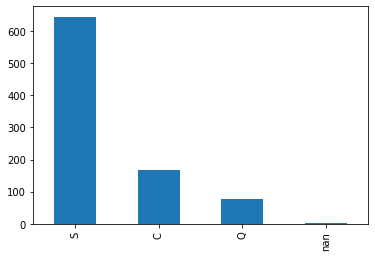

In [14]:
temp = trainingData["Embarked"]
temp.fillna("Empty").value_counts().plot(kind = "bar")

In [15]:
temp = trainingData[trainingData["Embarked"] == "nan"]["Embarked"].count()
print("NaN values: " + str(temp))
print("Percent NaN: " + str(temp/trainingData["Embarked"].count()))

NaN values: 2
Percent NaN: 0.002244668911335578


## Data Purity

### Gender Entropy

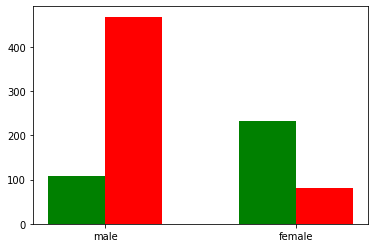

In [16]:
survived = trainingData[trainingData["Survived"] == 1]
perished = trainingData[trainingData["Survived"] == 0]

survivedM = survived[survived["Sex"] == "male"]
survivedF = survived[survived["Sex"] == "female"]
perishedM = perished[perished["Sex"] == "male"]
perishedF = perished[perished["Sex"] == "female"]

plot = plt.subplot(111)
index= np.arange(2)
plot.bar(index-0.15, [len(survivedM.index), len(survivedF.index)], width=0.3, color="g", align="center")
plot.bar(index+0.15, [len(perishedM.index), len(perishedF.index)], width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(("male", "female"))
plt.show()

### PClass Entropy

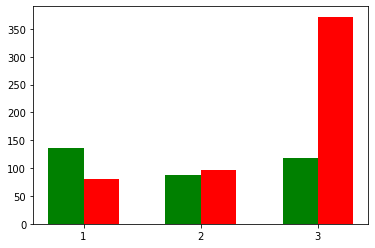

In [17]:
survived = trainingData[trainingData["Survived"] == 1]
perished = trainingData[trainingData["Survived"] == 0]

label = np.unique(survived["Pclass"], return_counts=False)

survivedV, survivedC = np.unique(survived["Pclass"],return_counts=True)
perishedV, perishedC = np.unique(perished["Pclass"],return_counts=True)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(label)
plt.show()

### SibSp Entropy

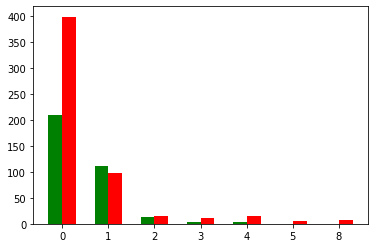

In [18]:
label = np.unique(trainingData["SibSp"], return_counts=False)

survivedV, survivedC = np.unique(survived["SibSp"],return_counts=True)
survivedV = np.append(survivedV,[5,8])
survivedC = np.append(survivedC,[0,0])
perishedV, perishedC = np.unique(perished["SibSp"],return_counts=True)


plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(label)
plt.show()

### Parch Entropy

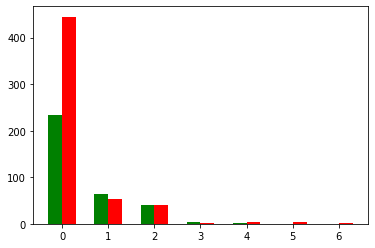

In [19]:
label = np.unique(trainingData["Parch"], return_counts=False)

survivedV, survivedC = np.unique(survived["Parch"],return_counts=True)
survivedV = np.append(survivedV,[4,6])
survivedC = np.append(survivedC,[0,0])
perishedV, perishedC = np.unique(perished["Parch"],return_counts=True)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(label)
plt.show()

### Embarked Entropy

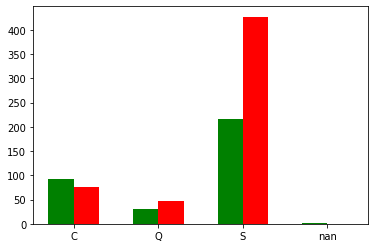

In [20]:
label = np.unique(trainingData["Embarked"], return_counts=False)

survivedV, survivedC = np.unique(survived["Embarked"],return_counts=True)
perishedV, perishedC = np.unique(perished["Embarked"],return_counts=True)
perishedV = np.append(perishedV, "nan")
perishedC = np.append(perishedC, 0)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(label)
plt.show()

### AgeGroup Entropy

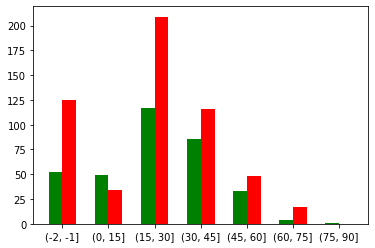

In [21]:
label = np.unique(trainingData["AgeGroup"], return_counts=False)

survivedV, survivedC = np.unique(survived["AgeGroup"],return_counts=True)
perishedV, perishedC = np.unique(perished["AgeGroup"],return_counts=True)
perishedV = np.append(perishedV, pd.Interval(75,90))
perishedC = np.append(perishedC, 0)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(label)
plt.show()

### TicketGroup Entropy

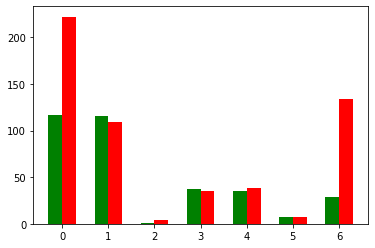

In [22]:
label = np.unique(trainingData["TicketGroup"], return_counts=False)

survivedV, survivedC = np.unique(survived["TicketGroup"],return_counts=True)
perishedV, perishedC = np.unique(perished["TicketGroup"],return_counts=True)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(index)
plt.show()

### CostGroup Entropy

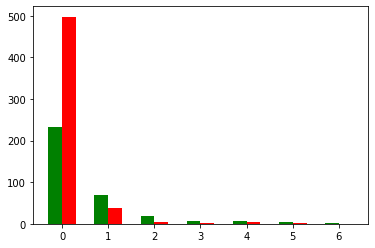

In [23]:
label = np.unique(trainingData["CostGroup"], return_counts=False)

survivedV, survivedC = np.unique(survived["CostGroup"],return_counts=True)
perishedV, perishedC = np.unique(perished["CostGroup"],return_counts=True)
perishedV = np.append(perishedV, pd.Interval(500,550))
perishedC = np.append(perishedC, 0)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(index)
plt.show()

## Name Analysis

In [47]:
def nameClass(row):
    if (re.search("Mr\.",row["Name"])):
        return("Mr.")
    elif (re.search("Mrs\.",row["Name"])):
        return("Mrs.")
    elif (re.search("Miss\.",row["Name"])):
        return("Miss.")
    else:
        return("No Title")
        
trainingData["Title"] = trainingData.apply(lambda row: nameClass(row), axis=1)

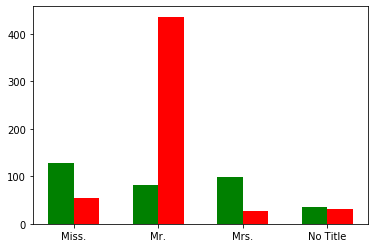

In [48]:
survived = trainingData[trainingData["Survived"] == 1]
perished = trainingData[trainingData["Survived"] == 0]
label = np.unique(trainingData["Title"], return_counts=False)

survivedV, survivedC = np.unique(survived["Title"],return_counts=True)
perishedV, perishedC = np.unique(perished["Title"],return_counts=True)
#print(survivedV)
#print(perishedV)

plot = plt.subplot()
index= np.arange(len(label))
plot.bar(index-0.15, survivedC, width=0.3, color="g", align="center")
plot.bar(index+0.15, perishedC, width=0.3, color="r", align="center")
plot.set_xticks(index)
plot.set_xticklabels(label)
plt.show()